## Library

In [1]:
import pandas as pd

from relative_path import PATH_DATA
from visualization import VisualizeMissing, export_profiling, export_correlation, export_col_hist

## Standard

In [2]:
TRACK_DATA = PATH_DATA / "tracks.parquet"
ARTISTS_DATA = PATH_DATA / "artists.parquet"

## Reading the Data

In [3]:
df_tracks = pd.read_parquet(TRACK_DATA)
df_artists = pd.read_parquet(ARTISTS_DATA)

## Preprocess and Export Data

In [4]:
# Sort values and reset index
df_tracks.sort_values(by="popularity", ascending=False, inplace=True)
df_tracks.reset_index(drop=True, inplace=True)

df_artists.sort_values(by="popularity", ascending=False, inplace=True)
df_artists.reset_index(drop=True, inplace=True)

In [5]:
# Export Datas
df_tracks.to_parquet(TRACK_DATA)
df_artists.to_parquet(ARTISTS_DATA)

## Explore with Pandas

### Explore Tracks Dataset

In [28]:
print(df_tracks.shape)
print(df_artists.shape)

(586672, 20)
(1104349, 5)


In [32]:
display(df_tracks.head(3))
display(df_artists.head(3))

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.321,0.000000,0.420,0.464,90.030,4
1,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.721,0.000013,0.105,0.132,143.874,4
2,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.175,0.000000,0.150,0.472,149.996,4


,id,followers,genres,name,popularity
0,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
1,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98
2,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98


In [22]:
print(df_tracks.index)
print(df_tracks.columns)

RangeIndex(start=0, stop=586672, step=1)
Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


In [36]:
display(df_tracks.info())
display(df_artists.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


None

In [38]:
display(df_tracks.describe())
display(df_artists.describe())

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


,followers,popularity
count,1.104336e+06,1.104349e+06
mean,1.074304e+04,9.083884e+00
std,2.609554e+05,1.376310e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.900000e+01,2.000000e+00
75%,4.510000e+02,1.400000e+01
max,7.890023e+07,1.000000e+02


In [40]:
display(df_tracks.value_counts())
display(df_artists.value_counts())

id                      name                                         popularity  duration_ms  explicit  artists                             id_artists                                            release_date  danceability  energy   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    time_signature
0004Uy71ku11n3LMpuyf59  24.11.94 - Wersja Akustyczna                 34          258907       0         ['Golden Life']                     ['3NyQ2NjqMjDtVSiEkXFW2r']                            2012-01-01    0.623         0.59900  6    -9.255    1     0.0255       0.1770        0.00148           0.0748    0.381    140.056  4                 1
57NqY1NP6lLkhWPMPGzl9T  Back to U                                    1           212125       0         ['ArtLec']                          ['2aqJXiggBZaS7nbLUMTMKo']                            2018-12-10    0.965         0.69000  11   -7.782    0     0.0944       0.1570        0.01500           0.1930    0.662   

id                      followers  genres                                                                   name              popularity
0001K3ON4ACv7hte9Jlc6o  1.0        []                                                                       Chris             0             1
53pN11qa3C8Kg7bjFhn2II  4.0        []                                                                       Babyface Jay      0             1
53p1c0Fnb6srjMorsglFu7  1359.0     []                                                                       Wibutee           8             1
53p3F9PxpglQP5WcnbBvQ8  52.0       []                                                                       Walter Geiseking  2             1
53p5kiC47oEvG9E4VKDNl2  32836.0    ['classic polish pop', 'poezja spiewana', 'polish punk', 'sung poetry']  Jacek Kaczmarski  45            1
                                                                                                                                           ..
2LZ25CJGU1i

## Check Missing Values

In [6]:
vis_missing_tracks = VisualizeMissing(df_tracks, "Tracks", export=True, process_zero=True, process_null=True)

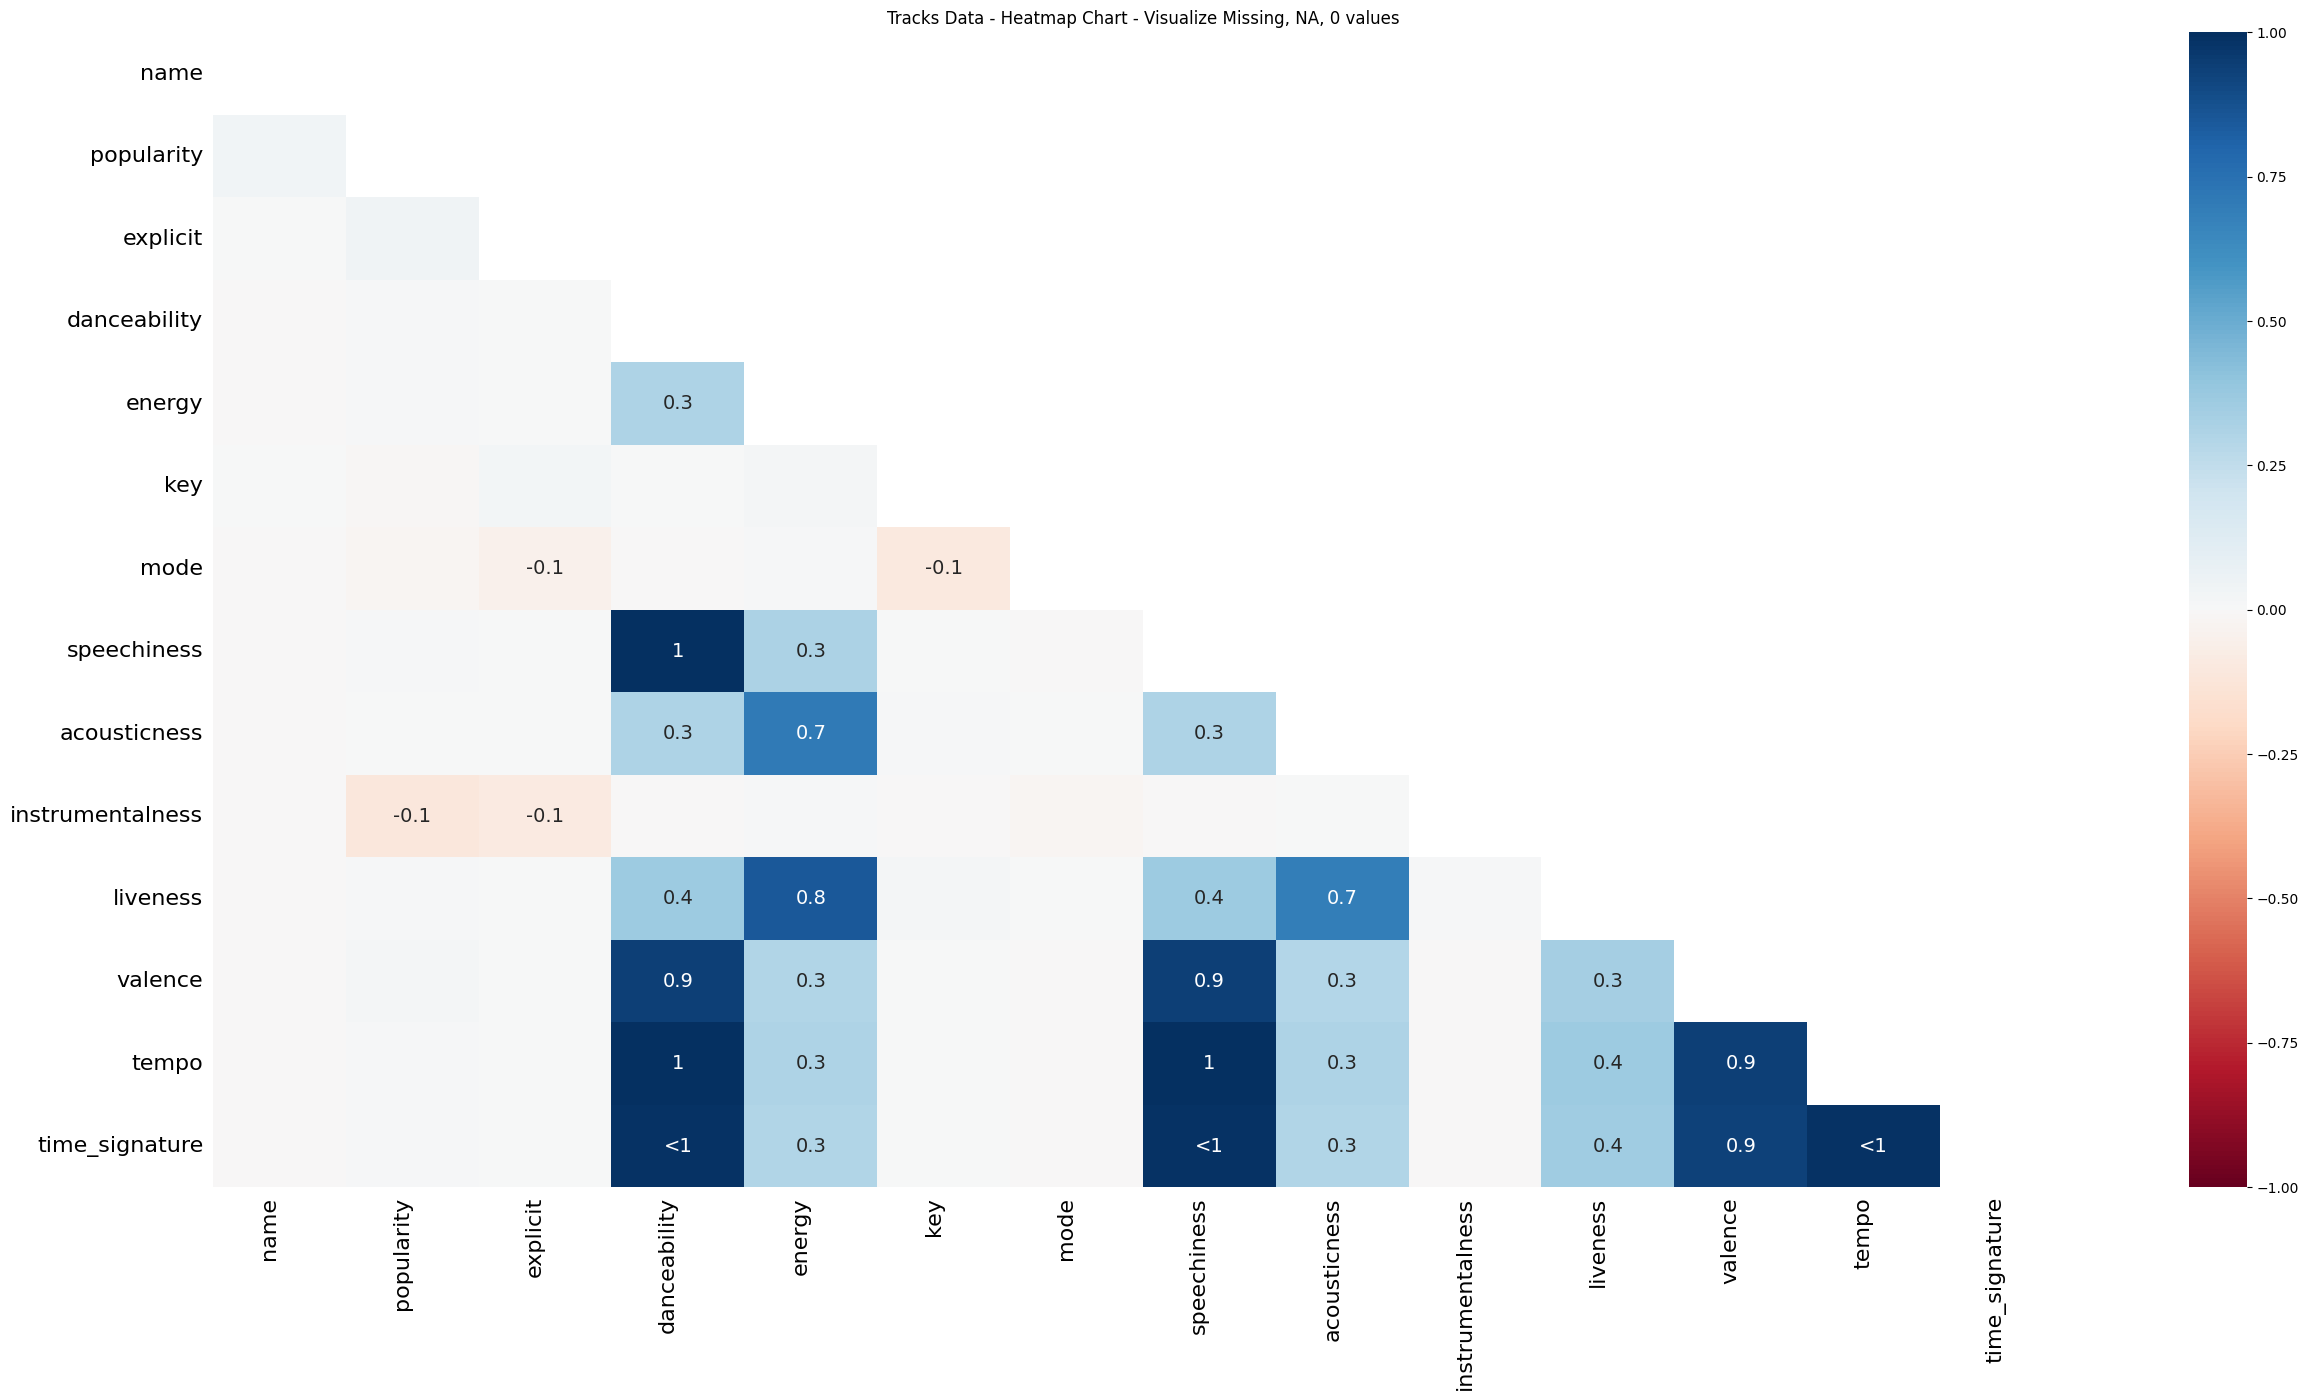

In [7]:
vis_missing_tracks.Heatmap()

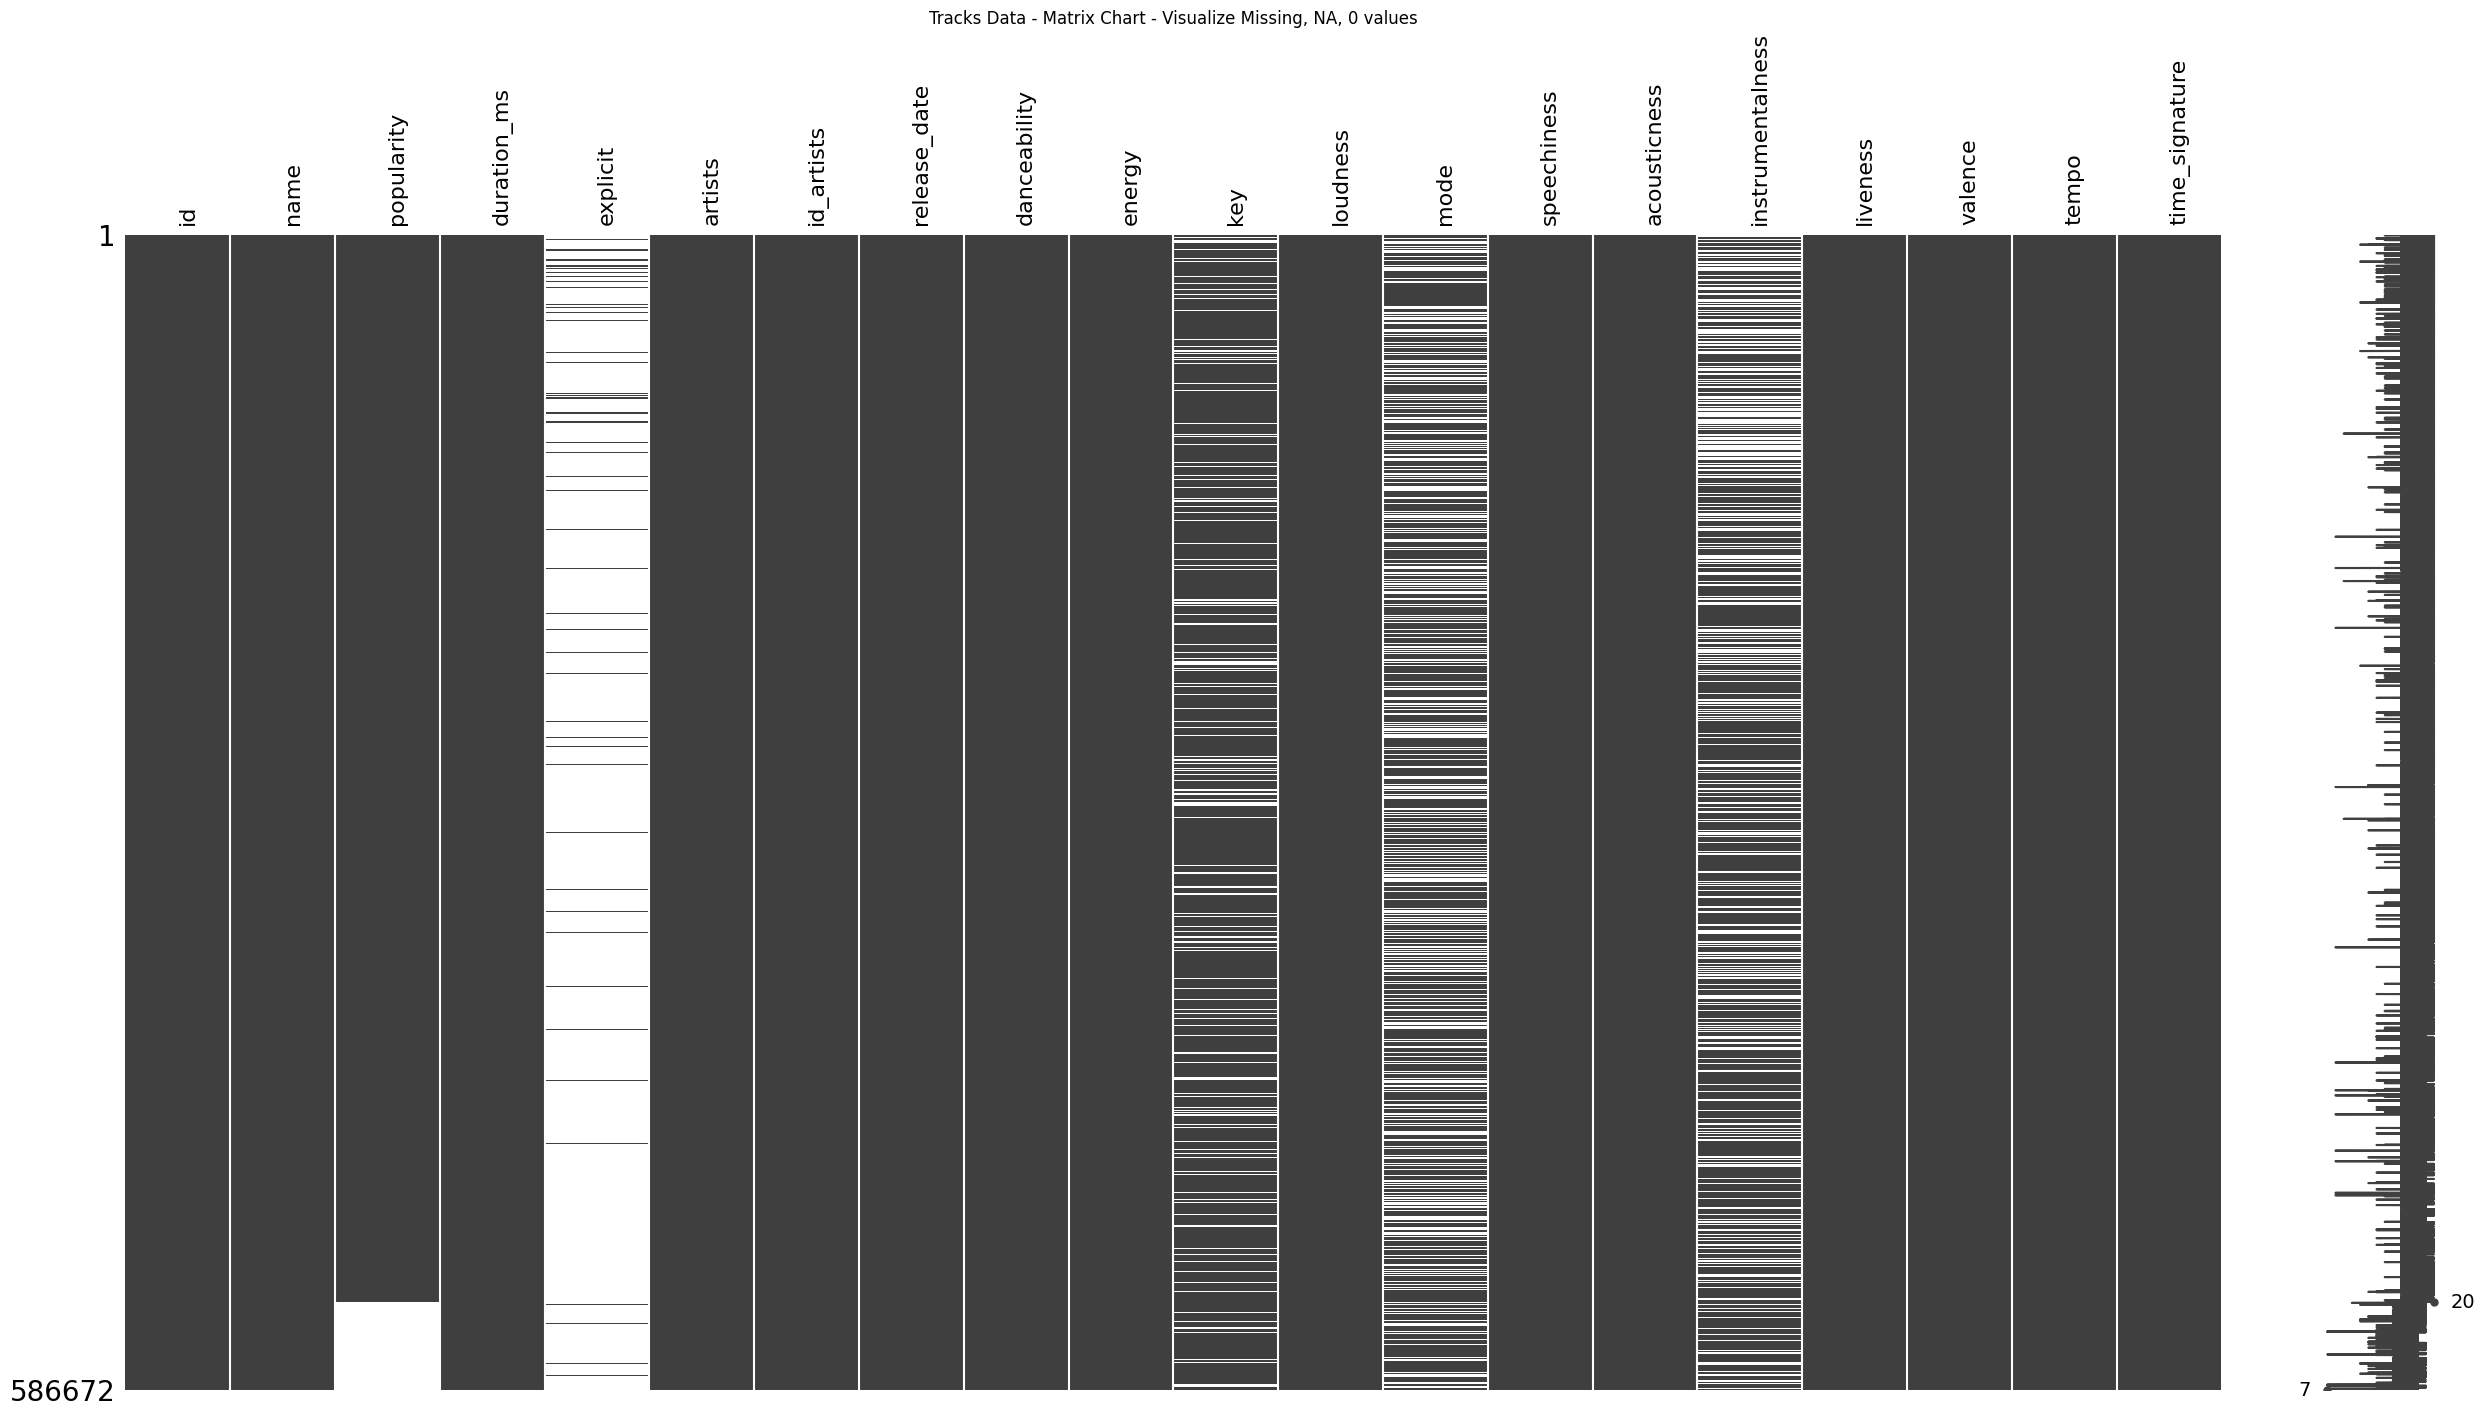

In [8]:
vis_missing_tracks.Matrix()

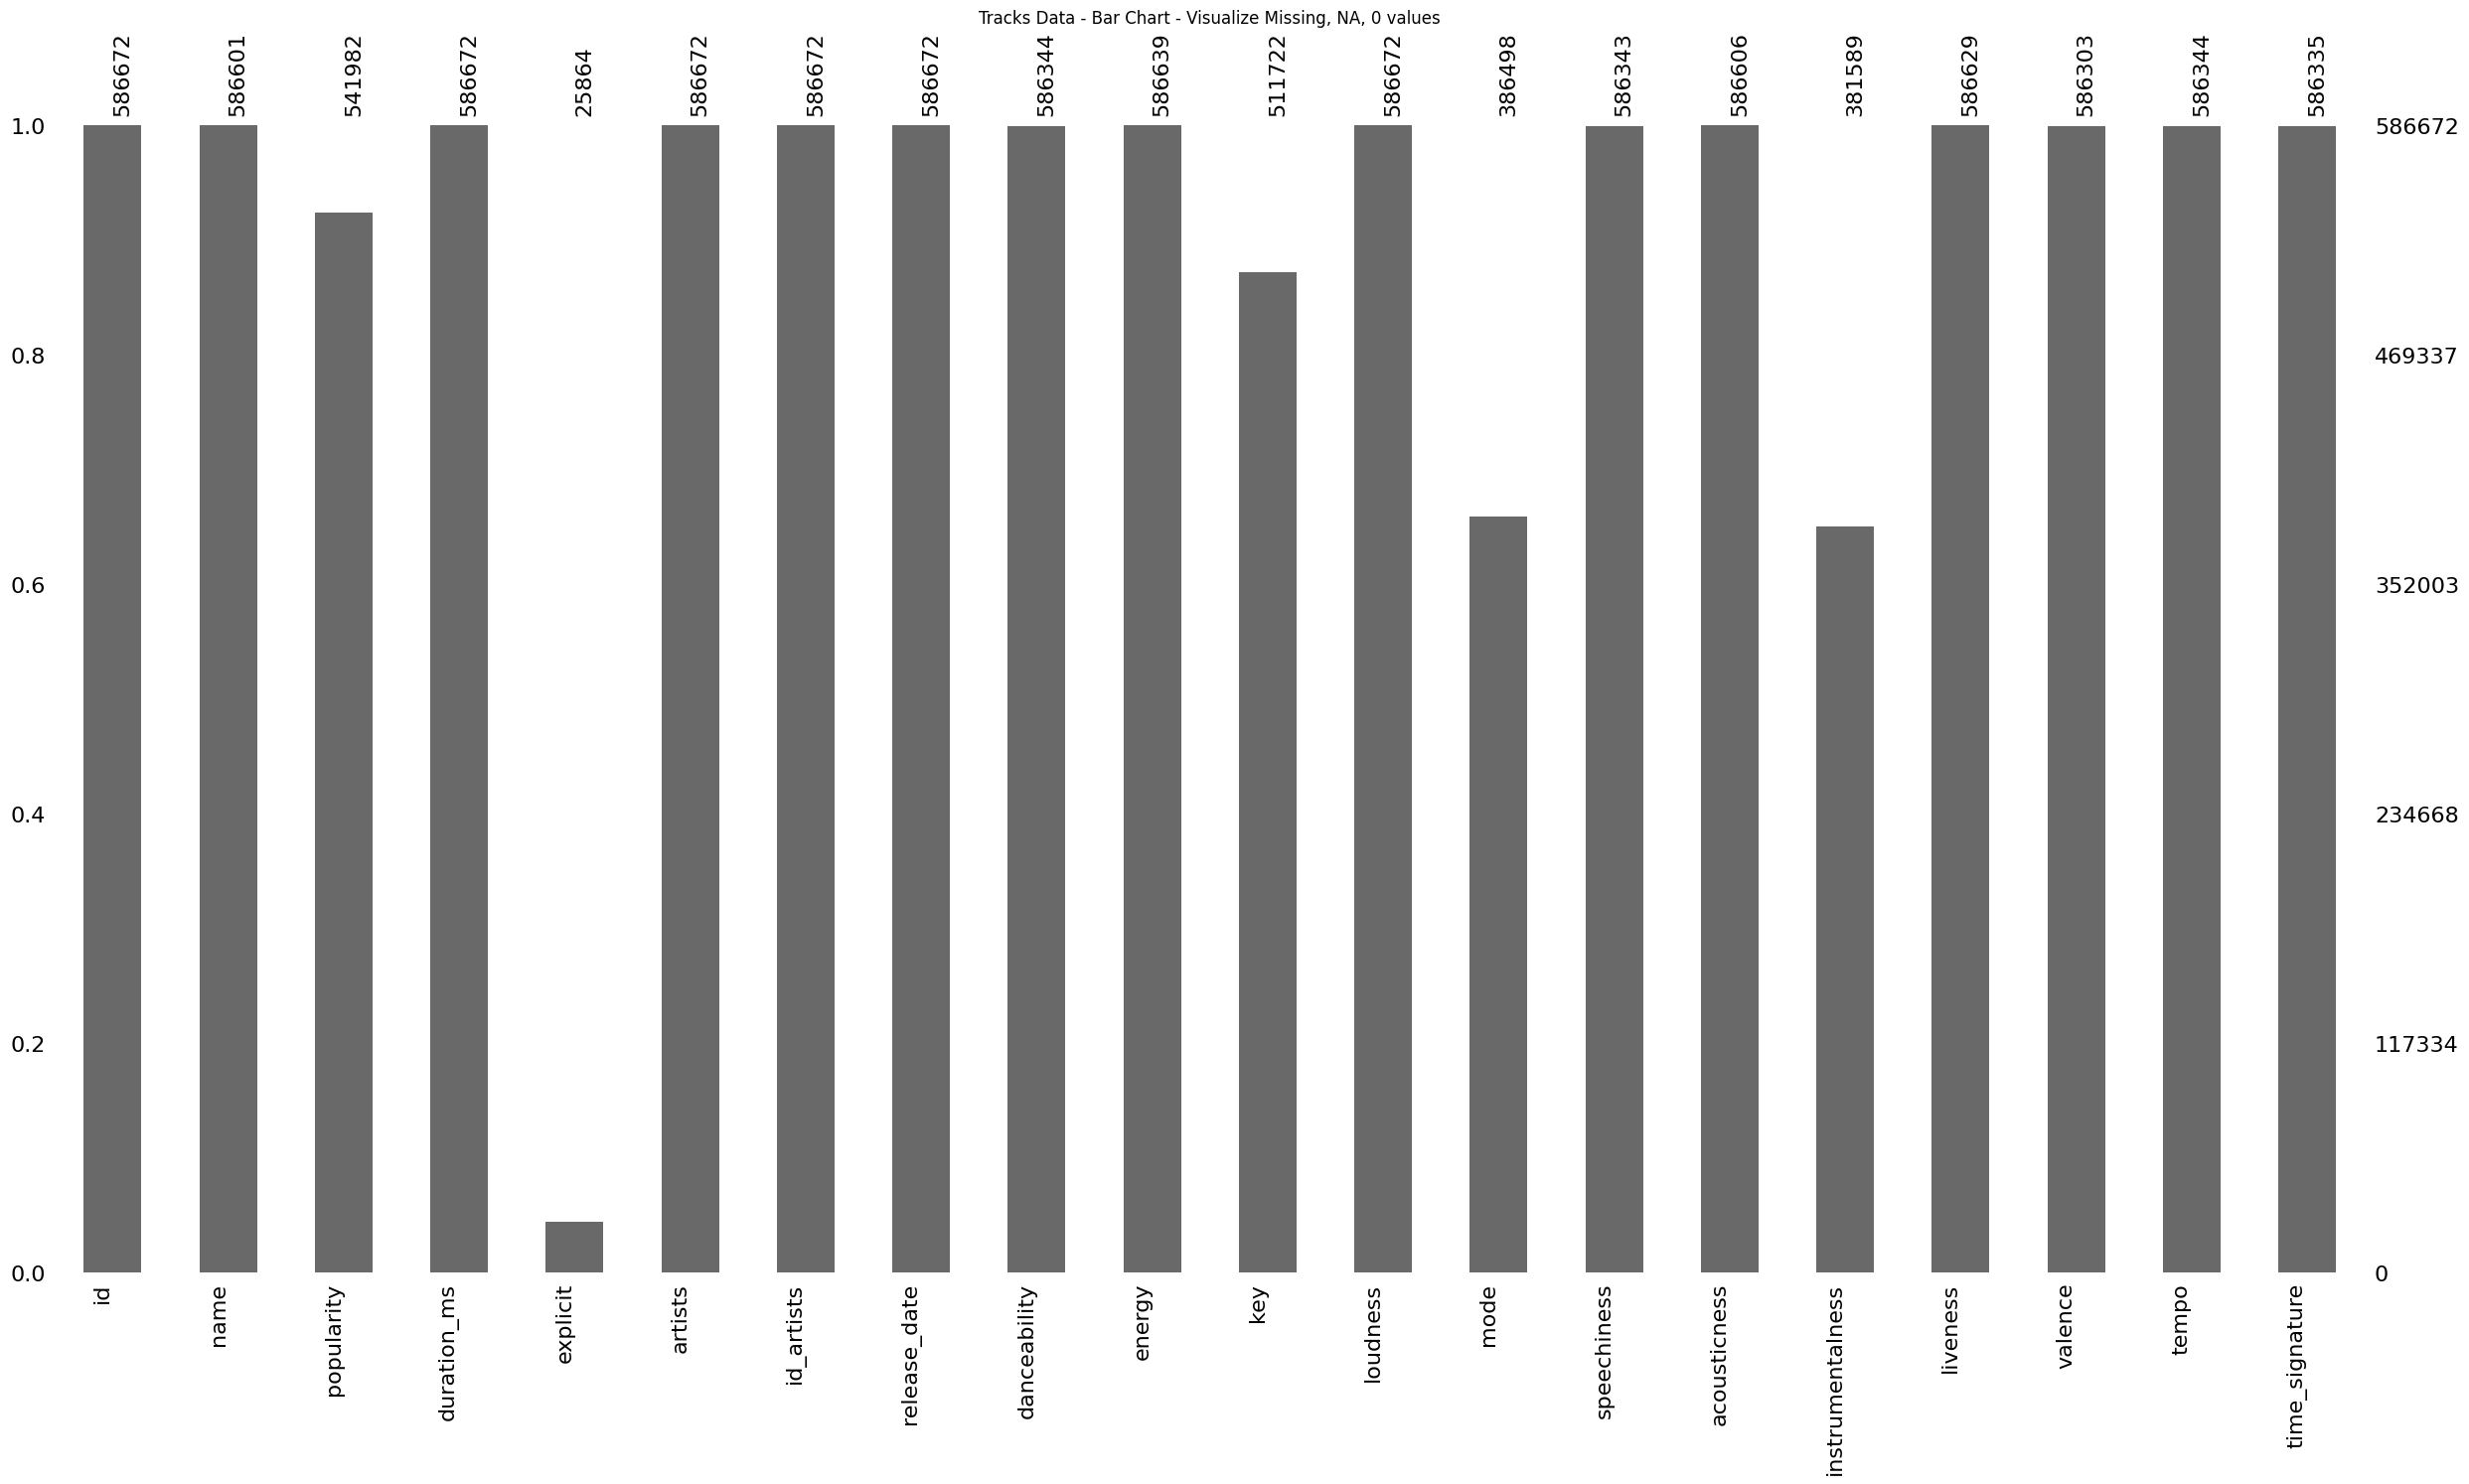

In [9]:
vis_missing_tracks.Bar()

In [10]:
vis_missing_artists = VisualizeMissing(df_artists, "Artists", export=True, process_zero=True, process_null=True)

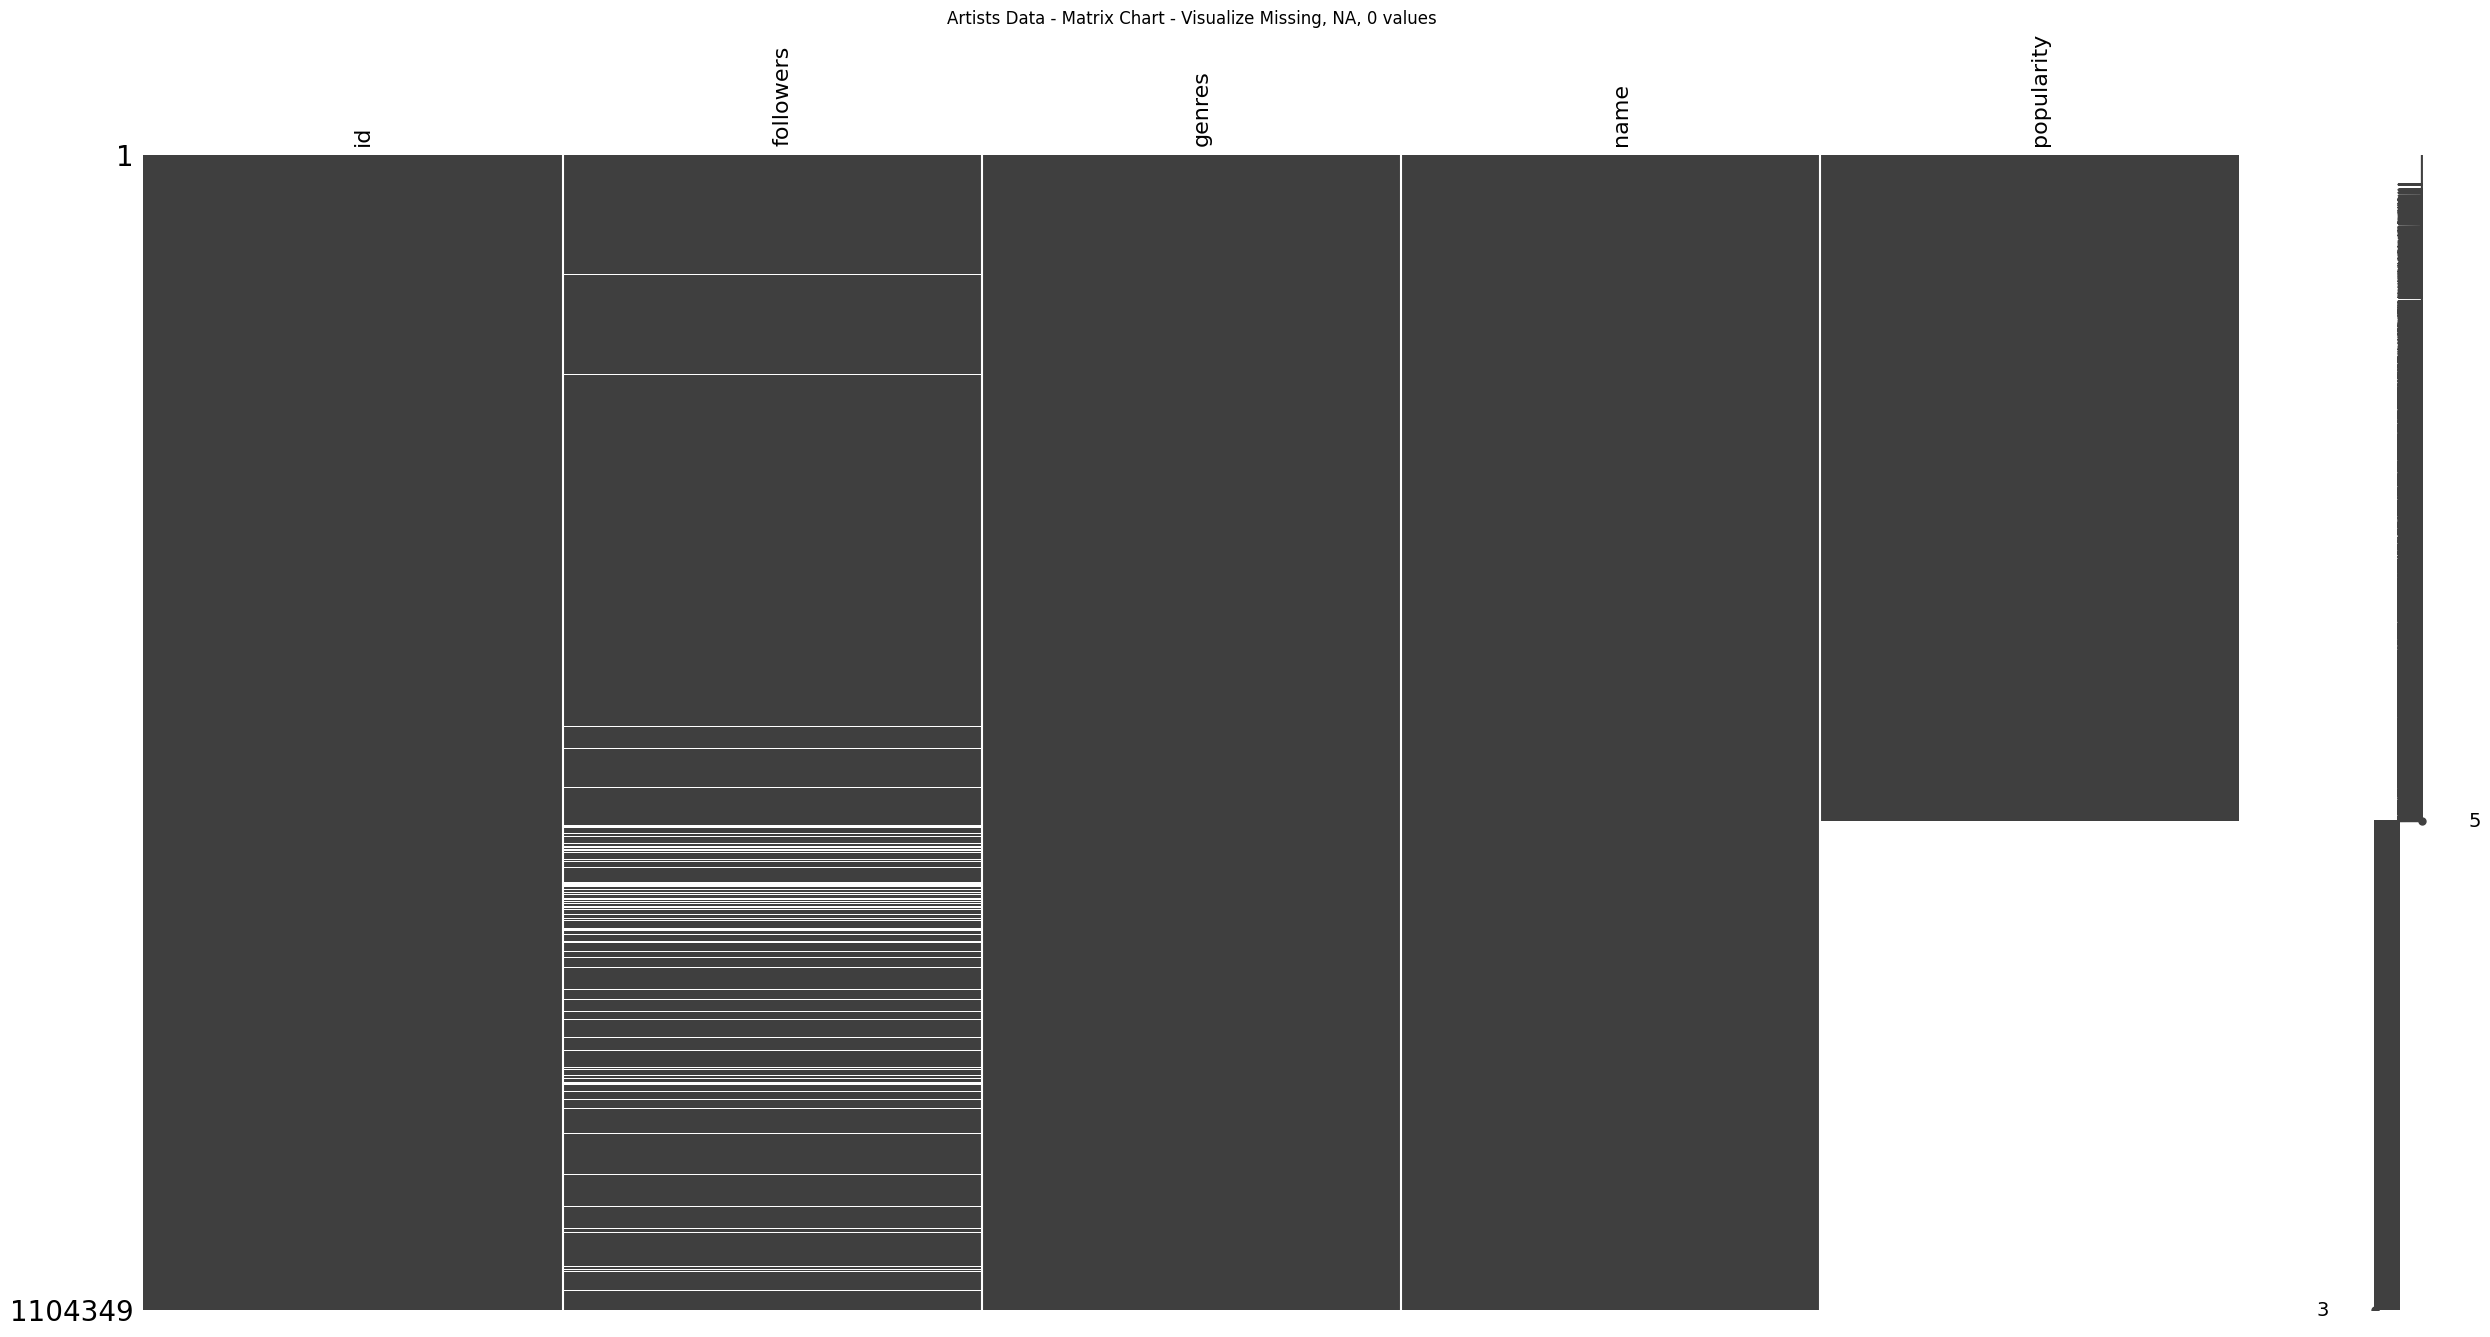

In [11]:
vis_missing_artists.Matrix()

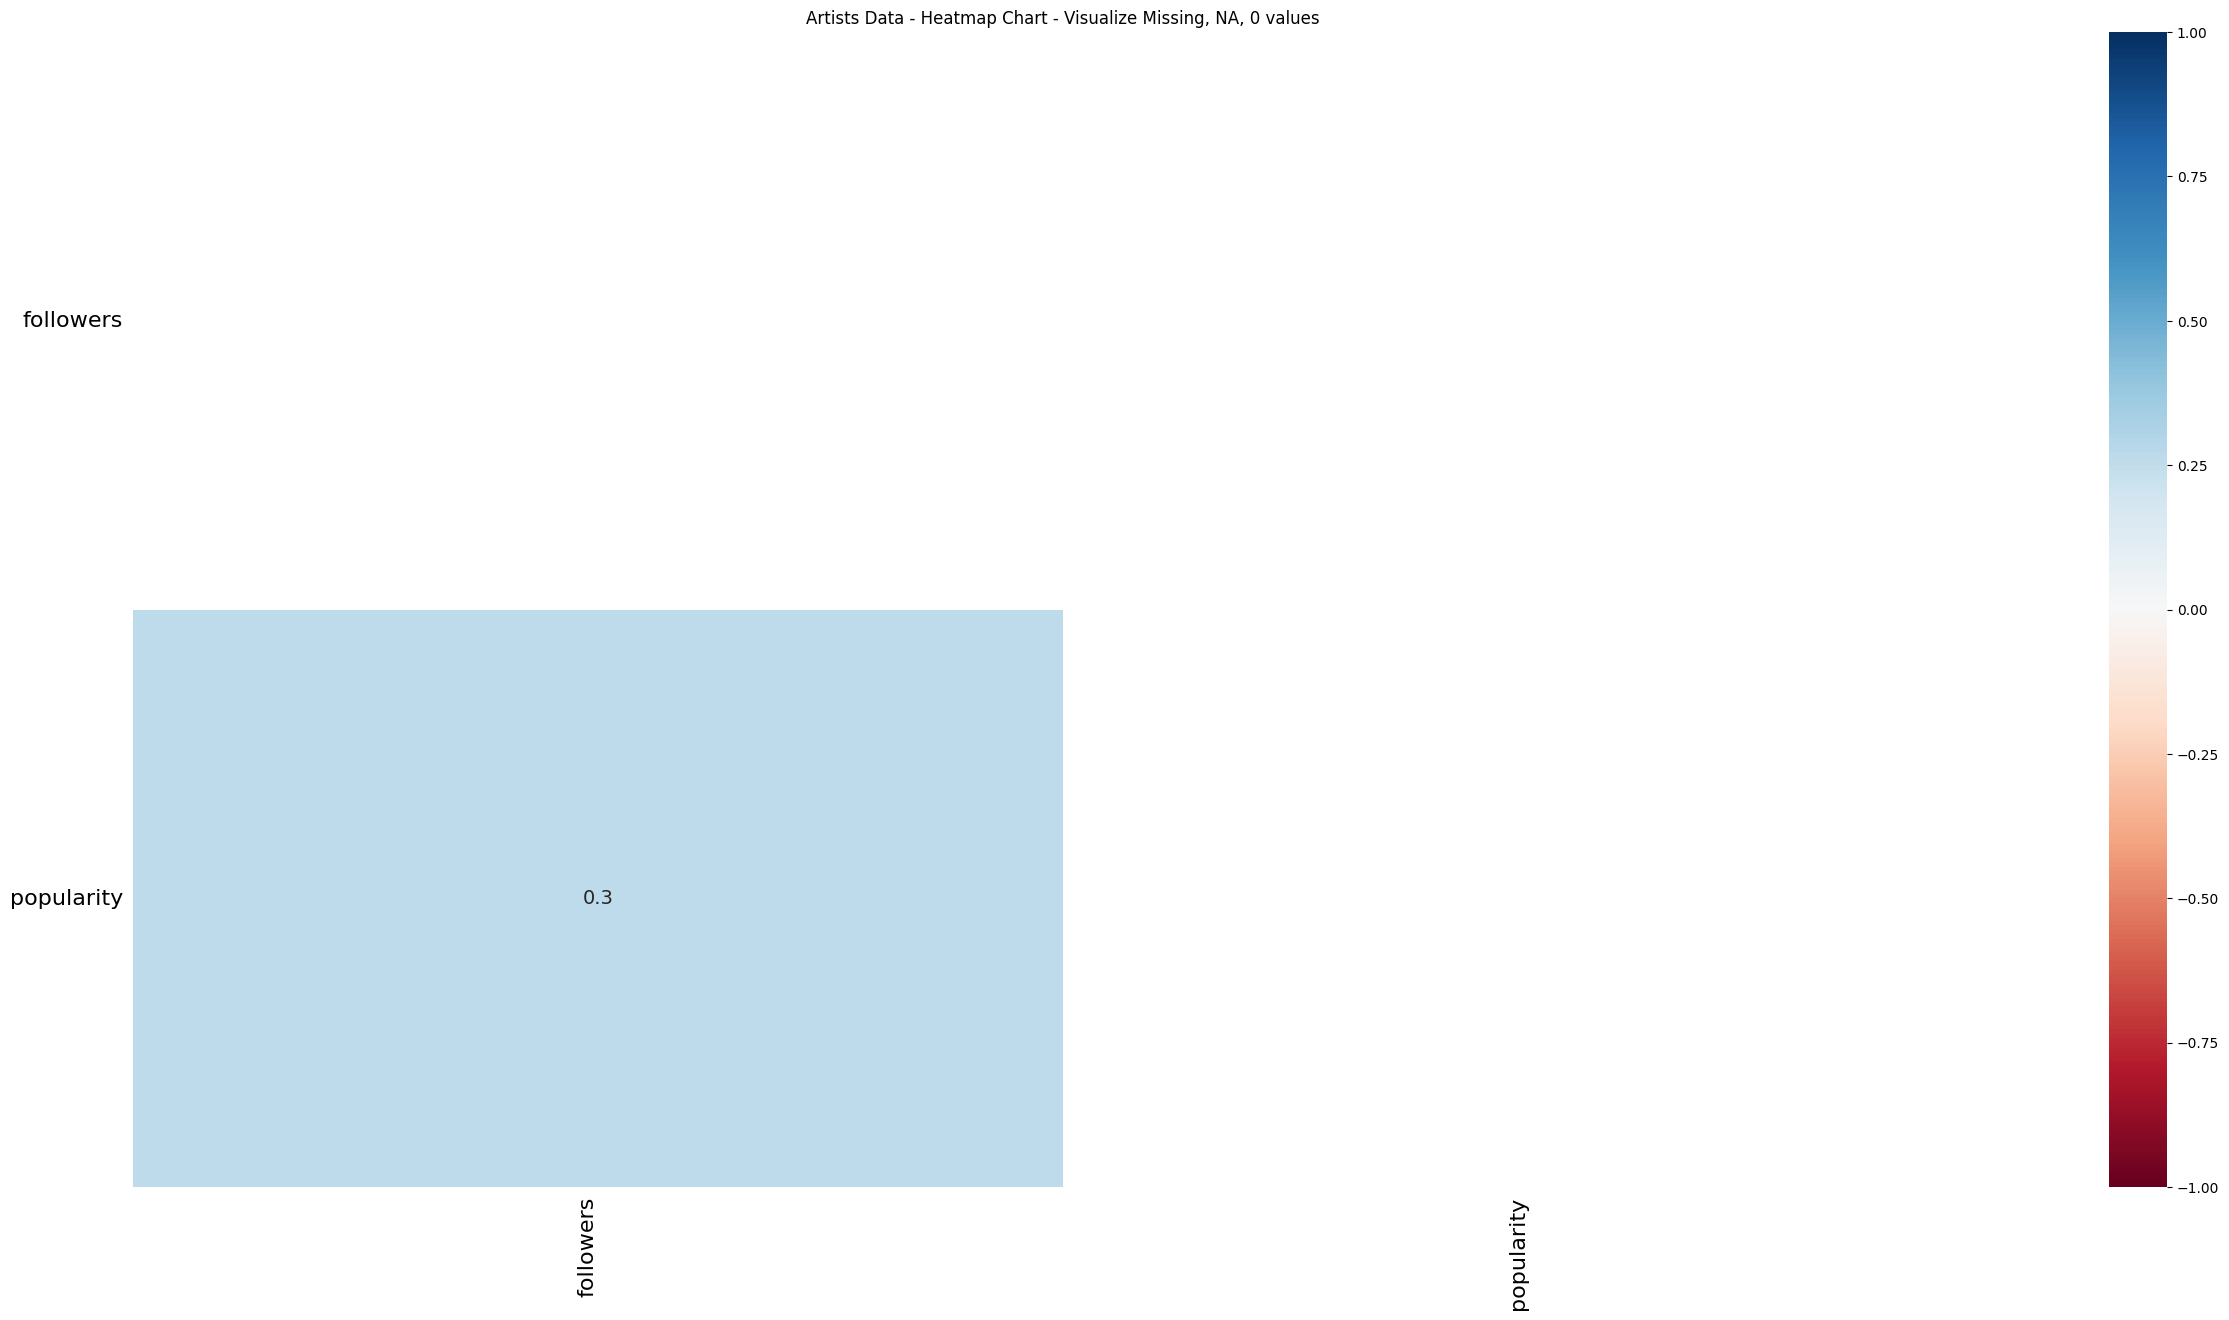

In [12]:
vis_missing_artists.Heatmap()

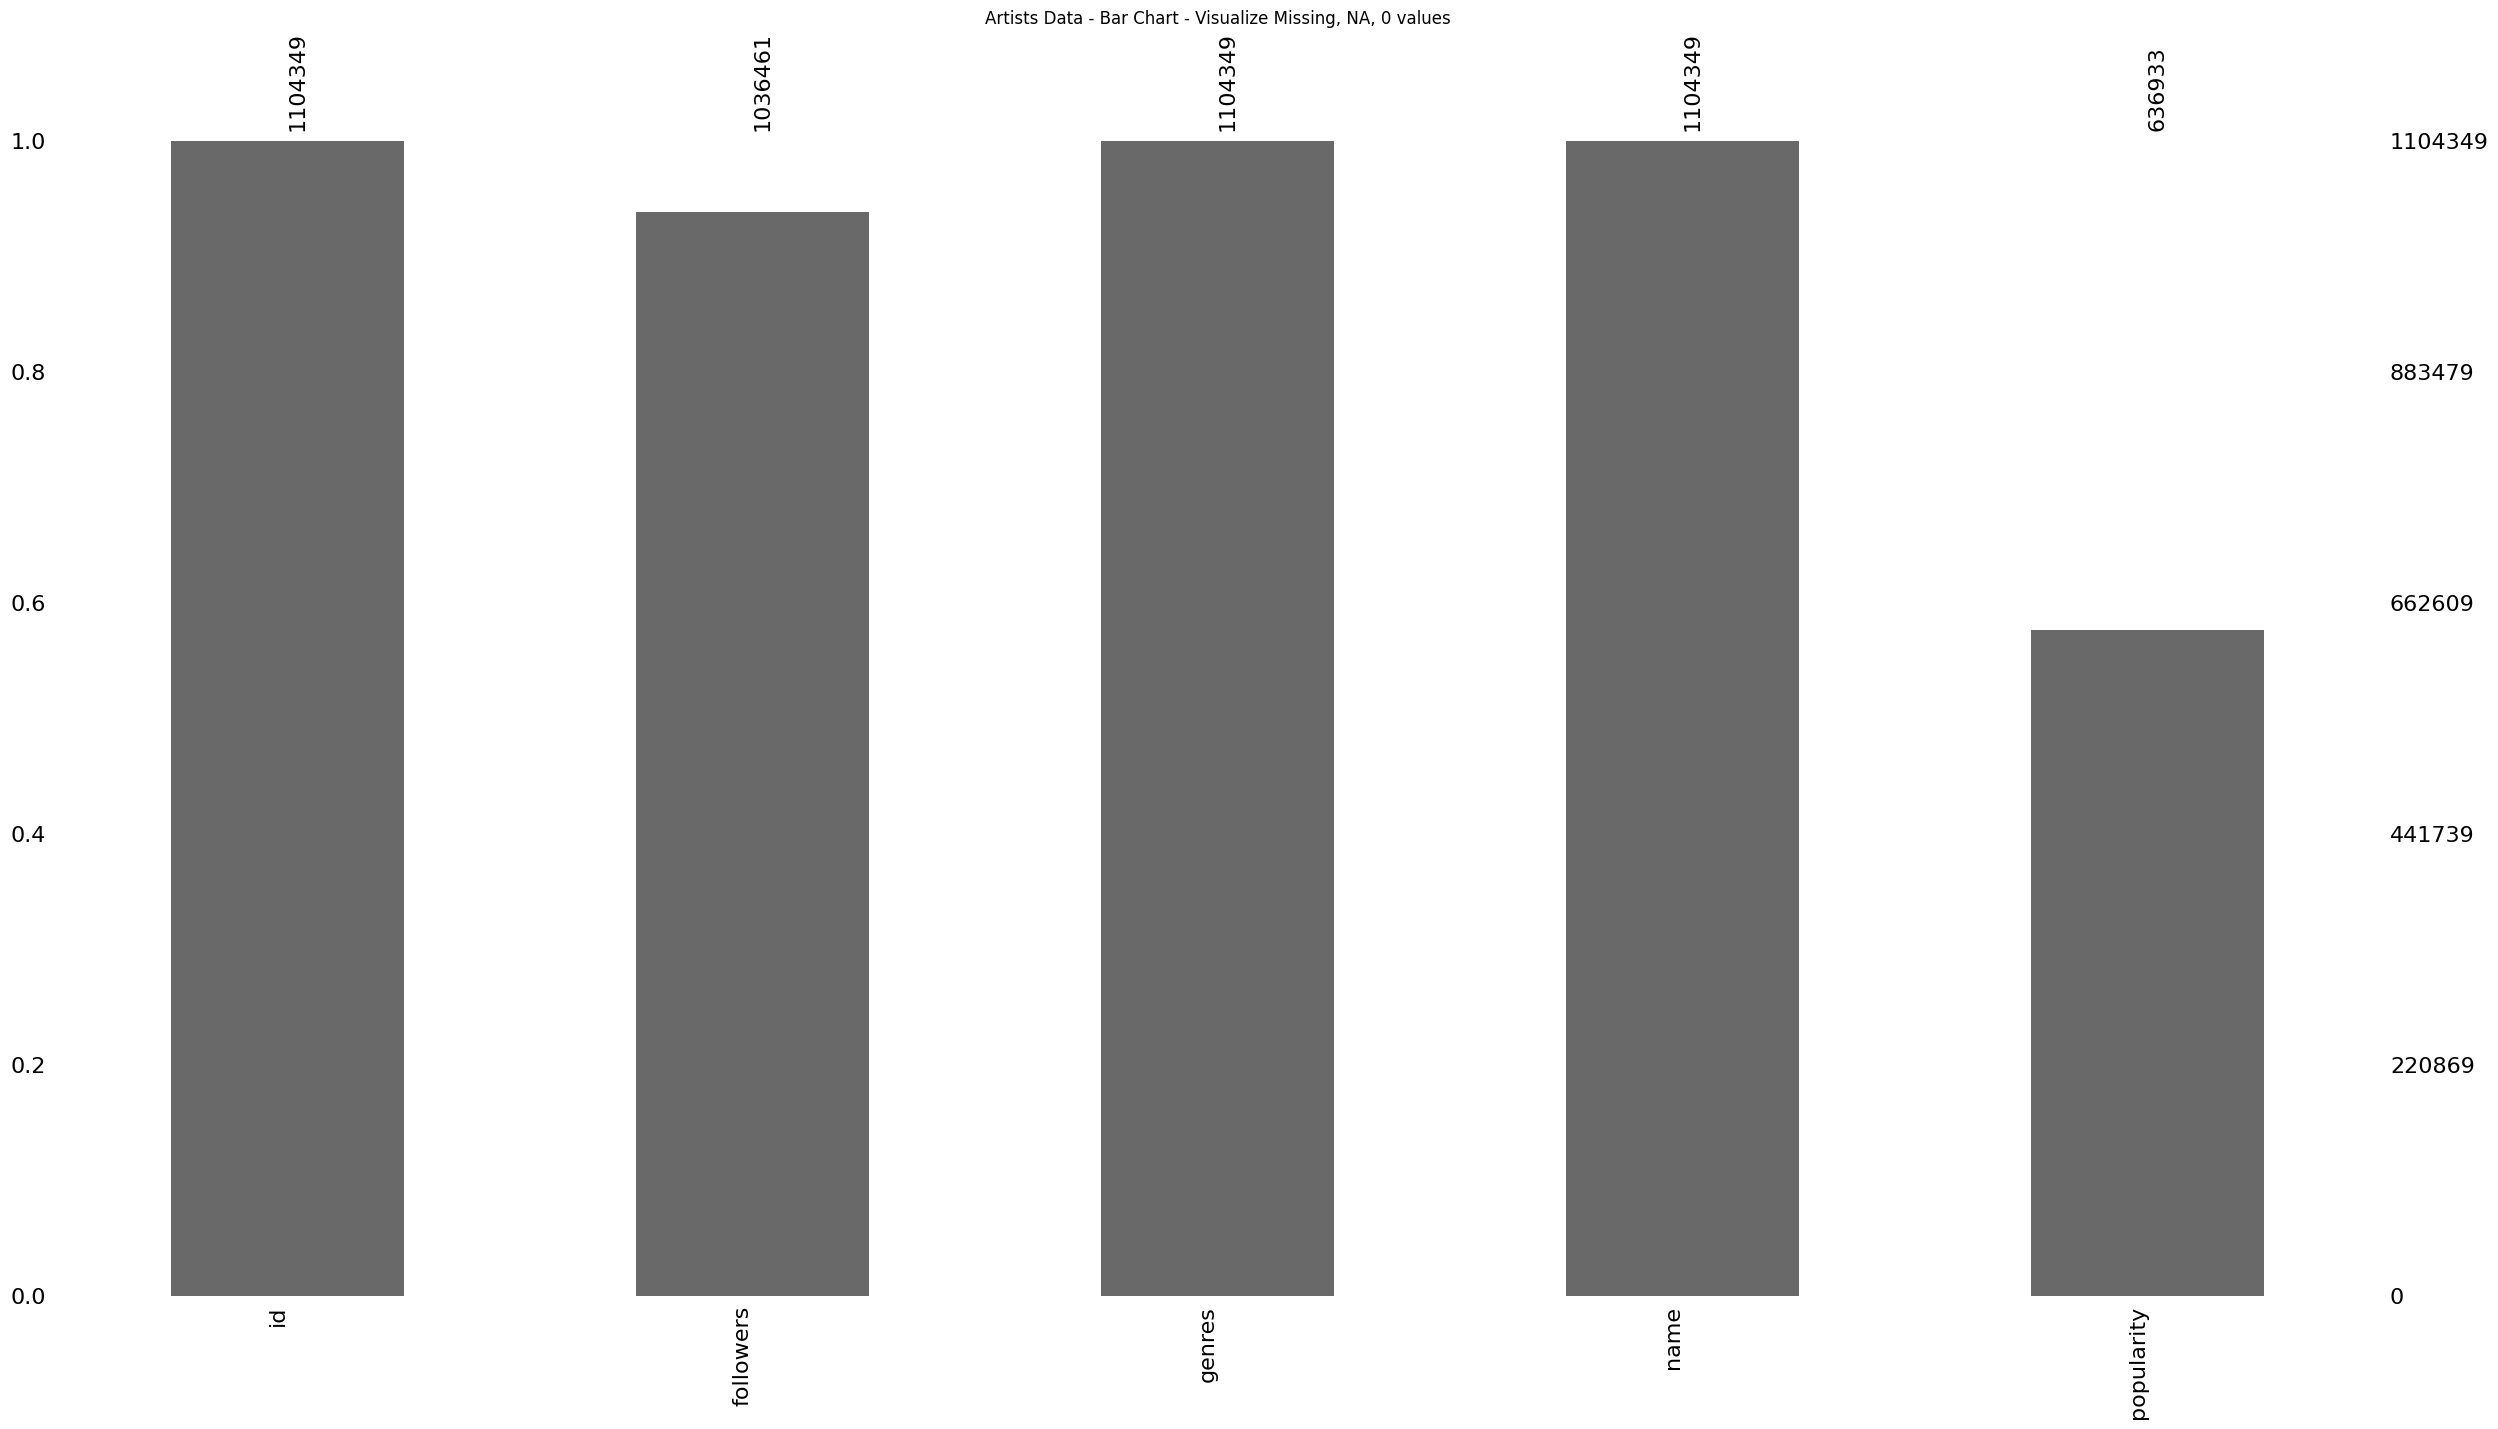

In [13]:
vis_missing_artists.Bar()